In [4]:
# %matplotlib inline
import yaml
from inspect import getsourcefile
import os.path
import os
os.system('module load gurobipy3')

import sys
import matplotlib
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import argparse
from io import StringIO
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime as DT

import seaborn as sns
# import gurobipy
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = os.path.dirname(current_dir)
parent_parent_dir = os.path.dirname(parent_dir)
sys.path.insert(0, parent_parent_dir+"/heuristics")

print(parent_parent_dir+"/heuristics")

# parent_dir = current_dir[:current_dir.rfind(os.path.sep)]
sys.path.insert(0, parent_parent_dir)


from group import SEIR_group, DynamicalModel
import math
import pprint
import pandas as pd
import pickle
import numpy as np
from copy import deepcopy



/usr/local/ifs/projects/daniancu-covid-targets/covid-optimization/heuristics


# Policy plotting

## Figure 3

linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-1859951.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
Total population is 12278209.994397134
Sum of I across the horizon is: 1522929.145307857
Delta in S is: 2496805.667246078
S at time T: 10168741.13577858
S at time T: 9781404.327151055
I at time T: 30988.276646408685
Minimum I over time: 12438.351036650696
Minimum I+E over time: 24872.39342719793


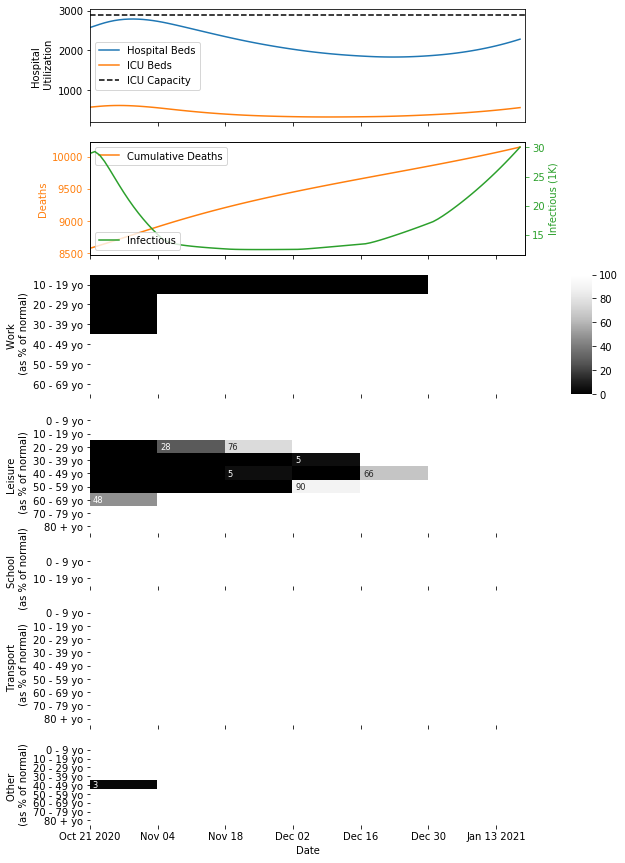

In [5]:


def todate(x, pos, initial_date=DT.date(2020, 10, 21)):
    if x == 0 or (initial_date+DT.timedelta(days=x) == DT.date(2021, 1, 13)):
        return (initial_date+DT.timedelta(days=x)).strftime("%b %d %Y")
    else:
        return (initial_date+DT.timedelta(days=x)).strftime("%b %d")
    

fmt = ticker.FuncFormatter(todate)


icus_to_try = [2900]
# ,2900,3200]
etas_to_try = [0.1]
# ,0.1,0.2]

xi_mult_values = [50]
# 0,10,25,50,100,150
xi_to_try = [mult * 37199.03  for mult in xi_mult_values]



for et in etas_to_try:
    for ic in icus_to_try:
        for x in xi_to_try:

            etas = [et]
            deltas = [0.5]
            icus = [ic]
            lockdown_freq=14
            testing_freq=7
            nmtests = [0]
                # 264357.37845079537, 271874.64987593645]
            natests = [0]
            xis = [x]

            heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            
            # "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
            # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
            # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
            # ,"dynamic_gradient"]
            #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            #  ["dynamic_gradient"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
            # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
            # ["dynamic_gradient"]
            # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

            # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        

            for h in heurs:
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:
                                    for xx in xis:
                                        
                                       


                                        fig, ax = plt.subplots(7,2, sharex='col', gridspec_kw={'width_ratios':[100,5], 'height_ratios':[17,17,18,18,5,18,12]}, figsize=[9,15])
                                        
                                        
                                        ax2 = ax[1,0].twinx()
                                        ax2.set_prop_cycle('color',plt.cm.PRGn(np.linspace(0,1,7)))
                                        ax[0,1].remove()  # remove unused upper right axes
                                        ax[1,1].remove()
                                        
                                        ax[3,1].remove()
                                        ax[4,1].remove()
                                        ax[5,1].remove()
                                        ax[6,1].remove()
                                       
                                        symbols = ["*",".","d","o","s","^"]
                                        T=90

                                        lockdowns_leisure = np.zeros((9, T))
                                        lockdowns_other = np.zeros((9, T))
                                        lockdowns_school = np.zeros((2, T))
                                        lockdowns_transport = np.zeros((9, T))
                                        lockdowns_work = np.zeros((6, T))

                                        testing = np.zeros((9, T))

                                        for file_name in os.listdir(h):
                                            instance = file_name.split("_")

                                            for p in instance:
                                                if "xi" in p:
                                                    xi = float(p.split("-")[1])
                                                    # print(xi)
                                                if "icus" in p:
                                                    icu = float(p.split("-")[1])
                                    #                 print(icu)
                                                if "natests" in p:
                                                    natest = float(p.split("-")[1])
                                    #                 print(natest)
                                                if "nmtests" in p:
                                                    nmtest = float(p.split("-")[1])
                                    #                 print(nmtest)
                                                if "dschool" in p:
                                                    delta = float(p.split("-")[1])
                                    #                 print(delta)
                                                if "eta" in p:
                                                    eta = float(p.split("-")[1])
                                    #                 print(eta)
                                                if "T" in p:
                                                    time = float(p.split("-")[1])

                                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and (math.floor(xi)==math.floor(xx)) and (time == 90) :
                                                print(h)
                                                print(instance)



                                                
                                                with open("%s/%s"%(h,file_name)) as file:
                                                    result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                # Read group parameters
                                                with open("../../parameters/fitted.yaml") as file:
                                                    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/econ.yaml") as file:
                                                    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read group parameters
                                                with open("../../parameters/one_group_fitted.yaml") as file:
                                                    universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/one_group_econ.yaml") as file:
                                                    econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                start_day = result["experiment_params"]["start_day"]

                                                if result["groups"] == "one":
                                                    universe_params = universe_params_one
                                                    econ_params = econ_params_one

                                                    with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                elif result["groups"] == "all":
                                                    universe_params = universe_params_all
                                                    econ_params = econ_params_all

                                                    with open("../../initialization/oct21.yaml") as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                else:
                                                    assert(False)

                                                experiment_params = result["experiment_params"]

                                                dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                for t in range(experiment_params["T"]):
                                                    dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                dynModel.take_end_steps()

                                                
                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)  
                                                print("====================================")
                                                print(f"Total population is {sum([dynModel.groups[group].S[0] for group in groups])+sum([dynModel.groups[group].E[0] for group in groups])+sum([dynModel.groups[group].I[0] for group in groups])+sum([dynModel.groups[group].R[0] for group in groups])+sum([dynModel.groups[group].Ia[0] for group in groups])+sum([dynModel.groups[group].Ips[0] for group in groups])+sum([dynModel.groups[group].Ims[0] for group in groups])+sum([dynModel.groups[group].Iss[0] for group in groups])+sum([dynModel.groups[group].Rq[0] for group in groups])+sum([dynModel.groups[group].H[0] for group in groups])+sum([dynModel.groups[group].ICU[0] for group in groups])+sum([dynModel.groups[group].D[0] for group in groups])}")
                                                print(f"Sum of I across the horizon is: {sum([sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)])}")
                                                print(f"Delta in S is: {sum([dynModel.groups[group].S[0] for group in groups]) - sum([dynModel.groups[group].S[T] for group in groups]) + sum([dynModel.groups[group].E[0] for group in groups]) + sum([dynModel.groups[group].I[0] for group in groups])+sum([dynModel.groups[group].R[0] for group in groups])+sum([dynModel.groups[group].Ia[0] for group in groups])+sum([dynModel.groups[group].Ips[0] for group in groups])+sum([dynModel.groups[group].Ims[0] for group in groups])+sum([dynModel.groups[group].Iss[0] for group in groups])+sum([dynModel.groups[group].Rq[0] for group in groups])+sum([dynModel.groups[group].H[0] for group in groups])+sum([dynModel.groups[group].ICU[0] for group in groups])+sum([dynModel.groups[group].D[0] for group in groups])}")
                                                print(f"S at time T: {sum([dynModel.groups[group].S[0] for group in groups])}")
                                                print(f"S at time T: {sum([dynModel.groups[group].S[T] for group in groups])}")
                                                print(f"I at time T: {sum([dynModel.groups[group].I[T] for group in groups])}")
                                                print(f"Minimum I over time: {min([sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)])}")
                                                print(f"Minimum I+E over time: {min([sum([dynModel.groups[group].I[i] + dynModel.groups[group].E[i] for group in groups]) for i in range(T)])}")




                                                # T = dynModel.time_steps - dynModel.END_DAYS

                                                # time_axis = [i*dynModel.dt for i in range(T+1)]
                                                # time_axis_controls = [i*dynModel.dt for i in range(T)]

                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)                                        

                                                
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].H[i] for group in groups]) for i in range(T)], label=f"Hospital Beds");
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].ICU[i] for group in groups]) for i in range(T)], label=f"ICU Beds");
                                                ax[0,0].hlines(dynModel.icus, 0, T, linestyle="dashed", colors=['black'], label="ICU Capacity")
                                                ax[1,0].plot(range(T), [sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)], label=f"Cumulative Deaths", color="C1");
                                                
                                                

                                                ax2.plot(range(T), [sum([dynModel.groups[group].I[i] for group in groups])/1000 for i in range(T)], label=f"Infectious", color="C2")
                                                ax2.legend(loc="lower left")
                                                ax2.set_ylabel("Infectious (1K)", color="C2")
                                                ax2.yaxis.set_label_position('right')
                                                ax2.tick_params(axis='y', colors="C2")

                                              
                                                ax[0,0].set_ylabel("Hospital \n Utilization")
                                                ax[0,0].legend();

                                                ax[1,0].set_ylabel("Deaths", color="C1")
                                                ax[1,0].tick_params(axis="y", colors="C1")

                                                ax[1,0].set_ylim(bottom=min([sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)])-100)
                                                ax[1,0].legend()

                                               
                                                age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79','age_group_80_plus']
                                                # age_groups = ["all_age_groups"]
                                                SEIR_groups = [ 'S_g', 'E_g', 'I_g', 'R_g', 'N_g', 'Ia_g', 'Ips_g', \
                                                    'Ims_g', 'Iss_g', 'Rq_g', 'H_g', 'ICU_g', 'D_g' ]
                                                activities = ['home','leisure','other','school','transport','work']

                                                
                                                
                                                total_days = dynModel.time_steps - dynModel.END_DAYS

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_leisure[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["leisure"]  * 100)
                                                        lockdowns_other[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["other"]  * 100)
                                                        lockdowns_transport[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["transport"]  * 100)
                                                        
                                                        testing[age_groups.index(n)][t] = round((dynModel.m_tests_controls[t][n] / nm)*100) if nm>0 else 0
                                                
                                                for n in [0,1]:
                                                    for t in range(T):
                                                        lockdowns_school[n][t] = round(dynModel.lockdown_controls[t][age_groups[n]]["school"] * 100)
                                                
                                                for n in [1,2,3,4,5,6]:
                                                    for t in range(T):
                                                        lockdowns_work[n-1][t] = round(dynModel.lockdown_controls[t][age_groups[n]]["work"] * 100)


                                                
                                                width = ax[0,0].get_xticks()[1] - ax[0,0].get_xticks()[0]
                                                 
                                                
                                              
                                        
                                        y_age_labels = ["0 - 9 yo","10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo","70 - 79 yo","80 + yo"]
                                        y_age_labels_school = ["0 - 9 yo","10 - 19 yo"]
                                        y_age_labels_work = ["10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo"]



                                        leisure_annot = [[("" if (lockdowns_leisure[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_leisure[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}

                                        ax[3,0] = sns.heatmap(lockdowns_leisure, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[3,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=leisure_annot, fmt="s", annot_kws=akws);
                                        ax[3,0].set_ylabel("Leisure \n (as % of normal)")

                                        other_annot = [[("" if (lockdowns_other[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_other[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}


                                        
                                        ax[6,0] = sns.heatmap(lockdowns_other, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[6,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=other_annot, fmt="s", annot_kws=akws);
                                        ax[6,0].set_ylabel("Other \n (as % of normal)")

                                        school_annot = [[("" if (lockdowns_school[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_school[n][t])}")    for t in range(T)   ] for n in range(2)]
                                        akws = {"size":'small', "ha":"left"}


                                        ax[4,0] = sns.heatmap(lockdowns_school, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[4,0], yticklabels=y_age_labels_school,linewidths=0.0, rasterized=True, annot=school_annot, fmt="s", annot_kws=akws);
                                        ax[4,0].set_ylabel("School \n (as % of normal)")

                                        transport_annot = [[("" if (lockdowns_transport[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_transport[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}
                                        
                                        ax[5,0] = sns.heatmap(lockdowns_transport, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[5,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=transport_annot, fmt="s", annot_kws=akws);
                                        ax[5,0].set_ylabel("Transport \n (as % of normal)")
                                        
                                        work_annot = [[("" if (lockdowns_work[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_work[n][t])}")    for t in range(T)   ] for n in range(6)]
                                        akws = {"size":'small', "ha":"left"}

                                        
                                        
                                        ax[2,0] = sns.heatmap(lockdowns_work, vmin=0, vmax=100, cmap='Greys_r', cbar_ax=ax[2,1], ax=ax[2,0], yticklabels=y_age_labels_work,linewidths=0.0, rasterized=True, annot=work_annot, fmt="s", annot_kws=akws);
                                        ax[2,0].set_ylabel("Work \n (as % of normal)")
                                        
                                        testing_annot = [[("" if (testing[n][t] in [0,100] or t%7!=0) else f"{int(testing[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"center"}
                                        # ax[7,0] = sns.heatmap(testing, vmin=0, vmax=100, cmap='Blues', cbar_ax=ax[7,1], ax=ax[7,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=testing_annot, fmt="s", annot_kws=akws);
                                        # ax[7,0].set_ylabel("testing")

                                        ax[6,0].xaxis.set_major_formatter(fmt)
                                        # fig.autofmt_xdate(rotation=0)  
                                        ax[6,0].xaxis.set_ticks(np.arange(0, T+1, 14.0))

                                        ax[6,0].set_xlabel("Date")

                                        # ax[6,0].xaxis.set_ticks(range(0,90,7))

                                        # ax[6,0].set_xticks(np.arange(0,90,7))

                                        a = fig.savefig(f"plots/test-Fig3-policies_heur={h}_eta={e}_icu={i}_xi={xx}_T={T}_nmtests={nm}.pdf", bbox_inches='tight');
                                           
                                




## With Testing

linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient
['xi-5579854.5', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-60000.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7.yaml']
Total population is 12278209.994397134
Sum of I across the horizon is: 671484.5760515799
Delta in S is: 2241904.8264151
S at time T: 10168741.13577858
S at time T: 10036305.167982033
I at time T: 9243.761750215182
Minimum I over time: 3622.8966652577474
Minimum I+E over time: 7335.613422557885


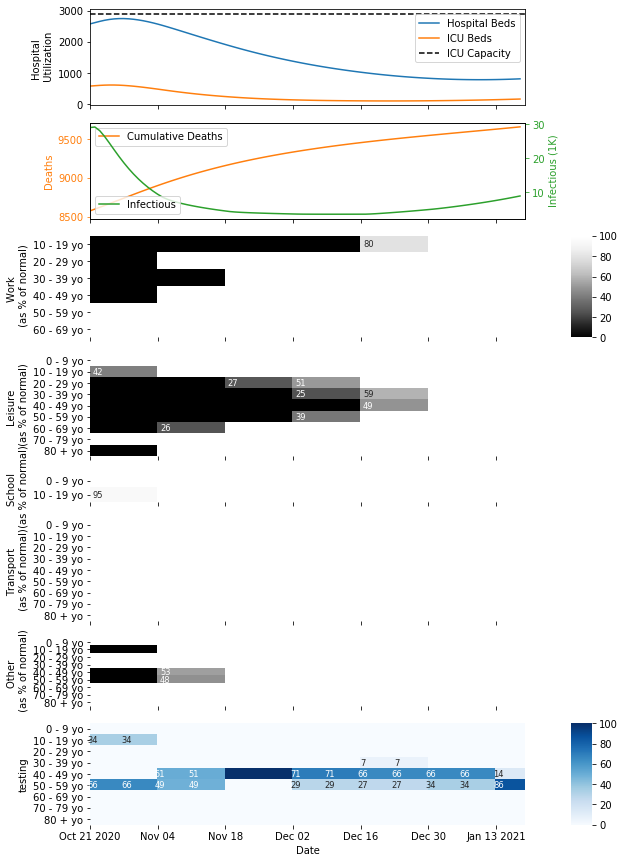

In [6]:
def todate(x, pos, initial_date=DT.date(2020, 10, 21)):
    if x == 0 or (initial_date+DT.timedelta(days=x) == DT.date(2021, 1, 13)):
        return (initial_date+DT.timedelta(days=x)).strftime("%b %d %Y")
    else:
        return (initial_date+DT.timedelta(days=x)).strftime("%b %d")
     

fmt = ticker.FuncFormatter(todate)


icus_to_try = [2900]
# ,2900,3200]
etas_to_try = [0.1]
# ,0.1,0.2]

xi_mult_values = [150]
# 0,10,25,50,100,150
xi_to_try = [mult * 37199.03  for mult in xi_mult_values]



for et in etas_to_try:
    for ic in icus_to_try:
        for x in xi_to_try:

            etas = [et]
            deltas = [0.5]
            icus = [ic]
            lockdown_freq=14
            testing_freq=7
            nmtests = [60000]
                # 264357.37845079537, 271874.64987593645]
            natests = [0]
            xis = [x]

            heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            
            # "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True"]
            # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # ,"linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient", "ICU_admissions_trigger","French_trigger_or"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=age_group_gradient_targetGroups=True_targetAct=False_targetTests=True", "linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True", "full_lockdown", "full_open"]
            # "linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=False_targetAct=True_targetTests=True"
            # linearization_heuristic_optBouncing=False_initial_uhat=time_gradient_targetGroups=False_targetAct=False_targetTests=True
            # ,"dynamic_gradient"]
            #  ["linearization_heuristic_optBouncing=False_initial_uhat=dynamic_gradient"]
            #  ["dynamic_gradient"]
            # ["linearization_heuristic_optBouncing=False_initial_uhat=full_open"]
            # ,"dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
            # ["dynamic_gradient"]
            # , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

            # xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

        

            for h in heurs:
                for e in etas:
                    for d in deltas:
                        for i in icus:
                            for nm in nmtests:
                                for na in natests:
                                    for xx in xis:
                                        
                                       


                                        fig, ax = plt.subplots(8,2, sharex='col', gridspec_kw={'width_ratios':[100,5], 'height_ratios':[17,17,18,18,5,18,12,18]}, figsize=[9,15])
                                        
                                        
                                        ax2 = ax[1,0].twinx()
                                        ax2.set_prop_cycle('color',plt.cm.PRGn(np.linspace(0,1,7)))
                                        ax[0,1].remove()  # remove unused upper right axes
                                        ax[1,1].remove()
                                        
                                        ax[3,1].remove()
                                        ax[4,1].remove()
                                        ax[5,1].remove()
                                        ax[6,1].remove()
                                        

                                        symbols = ["*",".","d","o","s","^"]
                                        T=90

                                        lockdowns_leisure = np.zeros((9, T))
                                        lockdowns_other = np.zeros((9, T))
                                        lockdowns_school = np.zeros((2, T))
                                        lockdowns_transport = np.zeros((9, T))
                                        lockdowns_work = np.zeros((6, T))

                                        testing = np.zeros((9, T))

                                        for file_name in os.listdir(h):
                                            instance = file_name.split("_")

                                            for p in instance:
                                                if "xi" in p:
                                                    xi = float(p.split("-")[1])
                                                    # print(xi)
                                                if "icus" in p:
                                                    icu = float(p.split("-")[1])
                                    #                 print(icu)
                                                if "natests" in p:
                                                    natest = float(p.split("-")[1])
                                    #                 print(natest)
                                                if "nmtests" in p:
                                                    nmtest = float(p.split("-")[1])
                                    #                 print(nmtest)
                                                if "dschool" in p:
                                                    delta = float(p.split("-")[1])
                                    #                 print(delta)
                                                if "eta" in p:
                                                    eta = float(p.split("-")[1])
                                    #                 print(eta)
                                                if "T" in p:
                                                    time = float(p.split("-")[1])

                                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and (math.floor(xi)==math.floor(xx)) and (time == 90) :
                                                print(h)
                                                print(instance)



                                                
                                                with open("%s/%s"%(h,file_name)) as file:
                                                    result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                # Read group parameters
                                                with open("../../parameters/fitted.yaml") as file:
                                                    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/econ.yaml") as file:
                                                    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read group parameters
                                                with open("../../parameters/one_group_fitted.yaml") as file:
                                                    universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                # Read econ parameters
                                                with open("../../parameters/one_group_econ.yaml") as file:
                                                    econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                start_day = result["experiment_params"]["start_day"]

                                                if result["groups"] == "one":
                                                    universe_params = universe_params_one
                                                    econ_params = econ_params_one

                                                    with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                elif result["groups"] == "all":
                                                    universe_params = universe_params_all
                                                    econ_params = econ_params_all

                                                    with open("../../initialization/oct21.yaml") as file:
                                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                else:
                                                    assert(False)

                                                experiment_params = result["experiment_params"]

                                                dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                for t in range(experiment_params["T"]):
                                                    dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                dynModel.take_end_steps()

                                                
                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)  
                                                print("====================================")
                                                print(f"Total population is {sum([dynModel.groups[group].S[0] for group in groups])+sum([dynModel.groups[group].E[0] for group in groups])+sum([dynModel.groups[group].I[0] for group in groups])+sum([dynModel.groups[group].R[0] for group in groups])+sum([dynModel.groups[group].Ia[0] for group in groups])+sum([dynModel.groups[group].Ips[0] for group in groups])+sum([dynModel.groups[group].Ims[0] for group in groups])+sum([dynModel.groups[group].Iss[0] for group in groups])+sum([dynModel.groups[group].Rq[0] for group in groups])+sum([dynModel.groups[group].H[0] for group in groups])+sum([dynModel.groups[group].ICU[0] for group in groups])+sum([dynModel.groups[group].D[0] for group in groups])}")
                                                print(f"Sum of I across the horizon is: {sum([sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)])}")
                                                print(f"Delta in S is: {sum([dynModel.groups[group].S[0] for group in groups]) - sum([dynModel.groups[group].S[T] for group in groups]) + sum([dynModel.groups[group].E[0] for group in groups]) + sum([dynModel.groups[group].I[0] for group in groups])+sum([dynModel.groups[group].R[0] for group in groups])+sum([dynModel.groups[group].Ia[0] for group in groups])+sum([dynModel.groups[group].Ips[0] for group in groups])+sum([dynModel.groups[group].Ims[0] for group in groups])+sum([dynModel.groups[group].Iss[0] for group in groups])+sum([dynModel.groups[group].Rq[0] for group in groups])+sum([dynModel.groups[group].H[0] for group in groups])+sum([dynModel.groups[group].ICU[0] for group in groups])+sum([dynModel.groups[group].D[0] for group in groups])}")
                                                print(f"S at time T: {sum([dynModel.groups[group].S[0] for group in groups])}")
                                                print(f"S at time T: {sum([dynModel.groups[group].S[T] for group in groups])}")
                                                print(f"I at time T: {sum([dynModel.groups[group].I[T] for group in groups])}")
                                                print(f"Minimum I over time: {min([sum([dynModel.groups[group].I[i] for group in groups]) for i in range(T)])}")
                                                print(f"Minimum I+E over time: {min([sum([dynModel.groups[group].I[i] + dynModel.groups[group].E[i] for group in groups]) for i in range(T)])}")





                                                groups = dynModel.groups.keys()
                                                groups = sorted(groups)                                        

                                                
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].H[i] for group in groups]) for i in range(T)], label=f"Hospital Beds");
                                                ax[0,0].plot(range(T), [sum([dynModel.groups[group].ICU[i] for group in groups]) for i in range(T)], label=f"ICU Beds");
                                                ax[0,0].hlines(dynModel.icus, 0, T, linestyle="dashed", colors=['black'], label="ICU Capacity")
                                                ax[1,0].plot(range(T), [sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)], label=f"Cumulative Deaths", color="C1");
                                                
                                                

                                                ax2.plot(range(T), [sum([dynModel.groups[group].I[i] for group in groups])/1000 for i in range(T)], label=f"Infectious", color="C2")
                                                ax2.legend(loc="lower left")
                                                ax2.set_ylabel("Infectious (1K)", color="C2")
                                                ax2.yaxis.set_label_position('right')
                                                ax2.tick_params(axis='y', colors="C2")

                                             
                                                ax[0,0].set_ylabel("Hospital \n Utilization")
                                                ax[0,0].legend();

                                                ax[1,0].set_ylabel("Deaths", color="C1")
                                                ax[1,0].tick_params(axis="y", colors="C1")

                                                ax[1,0].set_ylim(bottom=min([sum([dynModel.groups[group].D[i] for group in groups]) for i in range(T)])-100)
                                                ax[1,0].legend()

                                               
                                                age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79','age_group_80_plus']
                                                # age_groups = ["all_age_groups"]
                                                SEIR_groups = [ 'S_g', 'E_g', 'I_g', 'R_g', 'N_g', 'Ia_g', 'Ips_g', \
                                                    'Ims_g', 'Iss_g', 'Rq_g', 'H_g', 'ICU_g', 'D_g' ]
                                                activities = ['home','leisure','other','school','transport','work']

                                                
                                                
                                                total_days = dynModel.time_steps - dynModel.END_DAYS

                                                for n in dynModel.groups:
                                                    for t in range(T):        
                                                        lockdowns_leisure[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["leisure"]  * 100)
                                                        lockdowns_other[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["other"]  * 100)
                                                        lockdowns_transport[age_groups.index(n)][t] = round(dynModel.lockdown_controls[t][n]["transport"]  * 100)
                                                        
                                                        testing[age_groups.index(n)][t] = round((dynModel.m_tests_controls[t][n] / nm)*100) if nm>0 else 0
                                                
                                                for n in [0,1]:
                                                    for t in range(T):
                                                        lockdowns_school[n][t] = round(dynModel.lockdown_controls[t][age_groups[n]]["school"] * 100)
                                                
                                                for n in [1,2,3,4,5,6]:
                                                    for t in range(T):
                                                        lockdowns_work[n-1][t] = round(dynModel.lockdown_controls[t][age_groups[n]]["work"] * 100)


                                           
                                                width = ax[0,0].get_xticks()[1] - ax[0,0].get_xticks()[0]
                                                 
                                                
                                               
                                        
                                        y_age_labels = ["0 - 9 yo","10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo","70 - 79 yo","80 + yo"]
                                        y_age_labels_school = ["0 - 9 yo","10 - 19 yo"]
                                        y_age_labels_work = ["10 - 19 yo","20 - 29 yo","30 - 39 yo","40 - 49 yo","50 - 59 yo","60 - 69 yo"]



                                        leisure_annot = [[("" if (lockdowns_leisure[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_leisure[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}

                                        ax[3,0] = sns.heatmap(lockdowns_leisure, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[3,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=leisure_annot, fmt="s", annot_kws=akws);
                                        ax[3,0].set_ylabel("Leisure \n (as % of normal)")

                                        other_annot = [[("" if (lockdowns_other[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_other[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}


                                        
                                        ax[6,0] = sns.heatmap(lockdowns_other, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[6,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=other_annot, fmt="s", annot_kws=akws);
                                        ax[6,0].set_ylabel("Other \n (as % of normal)")

                                        school_annot = [[("" if (lockdowns_school[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_school[n][t])}")    for t in range(T)   ] for n in range(2)]
                                        akws = {"size":'small', "ha":"left"}


                                        ax[4,0] = sns.heatmap(lockdowns_school, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[4,0], yticklabels=y_age_labels_school,linewidths=0.0, rasterized=True, annot=school_annot, fmt="s", annot_kws=akws);
                                        ax[4,0].set_ylabel("School \n (as % of normal)")

                                        transport_annot = [[("" if (lockdowns_transport[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_transport[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"left"}
                                        
                                        ax[5,0] = sns.heatmap(lockdowns_transport, vmin=0, vmax=100, cmap='Greys_r', cbar=False, ax=ax[5,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=transport_annot, fmt="s", annot_kws=akws);
                                        ax[5,0].set_ylabel("Transport \n (as % of normal)")
                                        
                                        work_annot = [[("" if (lockdowns_work[n][t] in [0,100] or t%14!=0) else f"{int(lockdowns_work[n][t])}")    for t in range(T)   ] for n in range(6)]
                                        akws = {"size":'small', "ha":"left"}

                                        
                                        
                                        ax[2,0] = sns.heatmap(lockdowns_work, vmin=0, vmax=100, cmap='Greys_r', cbar_ax=ax[2,1], ax=ax[2,0], yticklabels=y_age_labels_work,linewidths=0.0, rasterized=True, annot=work_annot, fmt="s", annot_kws=akws);
                                        ax[2,0].set_ylabel("Work \n (as % of normal)")
                                        
                                        testing_annot = [[("" if (testing[n][t] in [0,100] or t%7!=0) else f"{int(testing[n][t])}")    for t in range(T)   ] for n in range(9)]
                                        akws = {"size":'small', "ha":"center"}
                                        ax[7,0] = sns.heatmap(testing, vmin=0, vmax=100, cmap='Blues', cbar_ax=ax[7,1], ax=ax[7,0], yticklabels=y_age_labels,linewidths=0.0, rasterized=True, annot=testing_annot, fmt="s", annot_kws=akws);
                                        ax[7,0].set_ylabel("testing")

                                        ax[7,0].xaxis.set_major_formatter(fmt)
                                        # fig.autofmt_xdate(rotation=0)  
                                        ax[7,0].xaxis.set_ticks(np.arange(0, T+1, 14.0))

                                        ax[7,0].set_xlabel("Date")

                                        # ax[6,0].xaxis.set_ticks(range(0,90,7))

                                        # ax[6,0].set_xticks(np.arange(0,90,7))

                                        a = fig.savefig(f"plots/test-Fig3-wTesting-policies_heur={h}_eta={e}_icu={i}_xi={xx}_T={T}_nmtests={nm}.pdf", bbox_inches='tight');
                                           
                                




## Fairness Plots

linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-0.7.yaml']
Found in results
0.7
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 'groups-all', 'dschool-0.5', 'eta-0.1', 'lockdownFreq-14', 'testingFreq-7', 'deltaFair-0.9.yaml']
Found in results
0.9
linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True
['xi-0.0', 'icus-2900.0', 'testing-linearization', 'heuristic', 'natests-0', 'nmtests-0.0', 'T-90', 'startday-0', 

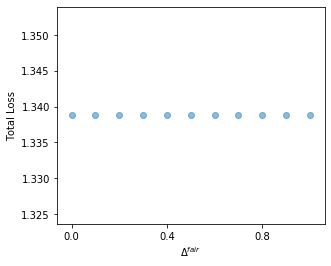

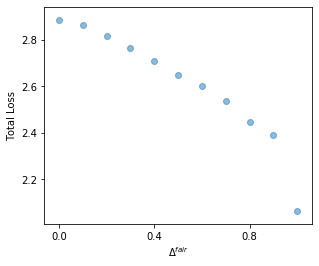

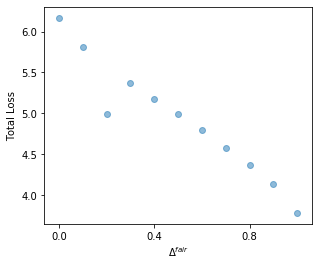

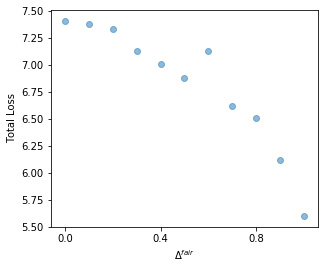

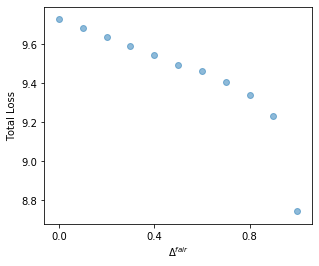

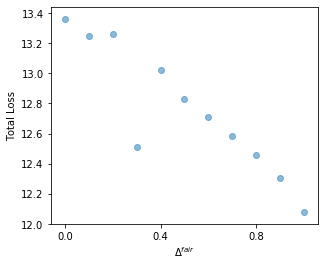

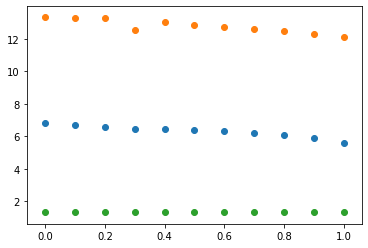

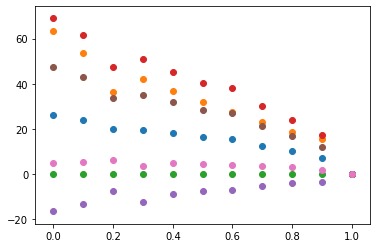

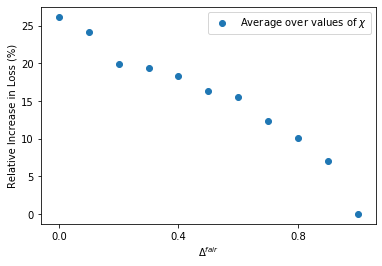

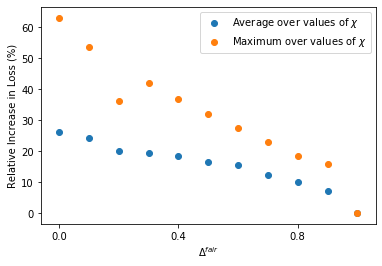

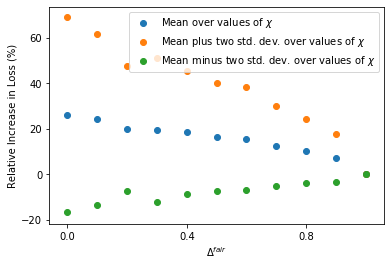

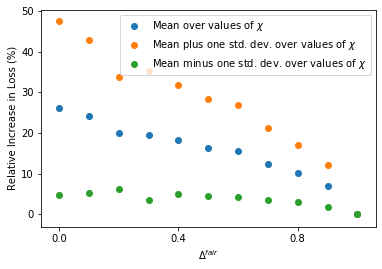

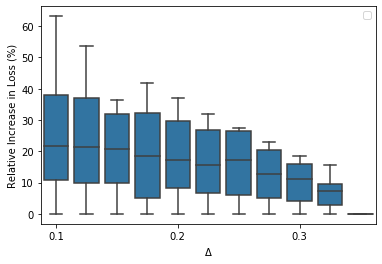

In [7]:
icus_to_try = [2900]
etas_to_try = [0.1]
nmtest_to_try = [0]
xi_mult_values = [0,10,25,50,100,150]
# 0,10,25,50,100,150
xis_to_try = [mult * 37199.03 for mult in xi_mult_values]

try:
    old_data = pd.read_excel("plots/results-Fairness.xlsx")
except FileNotFoundError:
    old_data = pd.DataFrame([{
                                            "lock_heuristic":"",
                                            "xi":0,
                                            "icus":0,
                                            "n_m_tests":0,
                                            "eta":0,
                                            "delta":0,
                                            "deltaFair":0,
                                            "economics_value":0,
                                            "deaths":0,
                                            "reward":0,
                                        }])

new_data = []

all_xis_fairness_dict = {}


for et in etas_to_try:
    for ic in icus_to_try:
        for n_test in nmtest_to_try:
            for xx in xis_to_try:

                all_xis_fairness_dict[xx] = {}

                etas = [et]
                deltas = [0.5]
                icus = [ic]
                lockdown_freq=14
                testing_freq=7
                nmtests = [n_test]
                natests = [0]

                heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=activity_gradient_targetGroups=True_targetAct=True_targetTests=True_fairnessOne=True"]
                

  

                fig1, ax1 = plt.subplots(1)
                box = ax1.get_position()
                ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

                


                for h in heurs:
                    for e in etas:
                        for d in deltas:
                            for i in icus:
                                for nm in nmtests:
                                    for na in natests:
                                        all_deaths = []
                                        all_econ_values = []
                                        all_rewards = []
                                        all_deltaFair = []
                                        
                                        
                                        for file_name in os.listdir(h):
                                            instance = file_name.split("_")

                                            for p in instance:
                                                if "xi" in p:
                                                    xi = float(p.split("-")[1])
                                    #                 print(xi)
                                                if "icus" in p:
                                                    icu = float(p.split("-")[1])
                                    #                 print(icu)
                                                if "natests" in p:
                                                    natest = float(p.split("-")[1])
                                    #                 print(natest)
                                                if "nmtests" in p:
                                                    nmtest = float(p.split("-")[1])
                                    #                 print(nmtest)
                                                if "dschool" in p:
                                                    delta = float(p.split("-")[1])
                                    #                 print(delta)
                                                if "eta" in p:
                                                    eta = float(p.split("-")[1])
                                    #                 print(eta)
                                                if "deltaFair" in p:
                                                    deltaFair = float(p.split("-")[1][:-5])
                                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d and xi == xx and deltaFair <=1 and deltaFair != 0.25 :
                                                print(h)
                                                print(instance)
                                                
                                                if not old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e) & (old_data["delta"] == d) & (old_data["deltaFair"] == deltaFair)].empty:

                                    
                                                    print("Found in results")
                                                    deaths = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e) & (old_data["delta"] == d) & (old_data["deltaFair"] == deltaFair)]["deaths"].item()
                                                    econ_value = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e) & (old_data["delta"] == d) & (old_data["deltaFair"] == deltaFair)]["economic_losses"].item()
                                                    reward = old_data.loc[(old_data["lock_heuristic"] == h) & (old_data["xi"] == round(xi/37199.03)) & (old_data["icus"] == i) & (old_data["n_m_tests"] == nm) & (old_data["eta"] == e) & (old_data["delta"] == d) & (old_data["deltaFair"] == deltaFair)]["total_loss"].item()
                                                else:



                                                    with open("%s/%s"%(h,file_name)) as file:
                                                        result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                                    # Read group parameters
                                                    with open("../../parameters/fitted.yaml") as file:
                                                        universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                    # Read econ parameters
                                                    with open("../../parameters/econ.yaml") as file:
                                                        econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                                    # Read group parameters
                                                    with open("../../parameters/one_group_fitted.yaml") as file:
                                                        universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                                    # Read econ parameters
                                                    with open("../../parameters/one_group_econ.yaml") as file:
                                                        econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                                    start_day = result["experiment_params"]["start_day"]

                                                    if result["groups"] == "one":
                                                        universe_params = universe_params_one
                                                        econ_params = econ_params_one

                                                        with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                                            initialization = yaml.load(file, Loader=yaml.FullLoader)

                                                    elif result["groups"] == "all":
                                                        universe_params = universe_params_all
                                                        econ_params = econ_params_all

                                                        with open("../../initialization/oct21.yaml") as file:
                                                            initialization = yaml.load(file, Loader=yaml.FullLoader)
                                                    else:
                                                        assert(False)

                                                    experiment_params = result["experiment_params"]

                                                    dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                                    for t in range(experiment_params["T"]):
                                                        dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                                    dynModel.take_end_steps()

                                                    deaths = dynModel.get_total_deaths()
                                                    econ_value = dynModel.get_total_reward() + dynModel.get_total_deaths() * xi 
                                                    reward = dynModel.get_total_reward()
                                                    data = {
                                            "lock_heuristic":h,
                                            "xi":round(result["experiment_params"]["xi"] / 37199.03),
                                            "icus":result["experiment_params"]["icus"],
                                            "n_m_tests":result["experiment_params"]["n_m_tests"],
                                            "eta":result["experiment_params"]["eta"],
                                            "economics_value":(dynModel.get_total_reward() + dynModel.get_total_deaths() * xi) / 1e9,
                                            "deaths":dynModel.get_total_deaths(),
                                            "reward":dynModel.get_total_reward(),
"delta":delta, 
"deltaFair":deltaFair
                                        }
                                    
                                                    new_data.append(data)
                                                
                                                all_deaths.append(deaths)
                                                all_econ_values.append(econ_value)
                                                all_deltaFair.append(deltaFair)
                                                print(deltaFair)

                                                all_xis_fairness_dict[xx][deltaFair] = reward
                                                
                                                all_rewards.append(reward)
                                            
                                        print(all_rewards)
                                        
                                        print(all_deltaFair)
                                        ax1.scatter(all_deltaFair, all_rewards, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}",alpha=0.5)

                                       
                                        print(all_econ_values)
                                        print(all_deaths)
                            

               
                ax1.set(ylabel='Total Loss')
                ax1.set_xlabel(r"$\Delta^{fair}$")
                ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

              
#Make losses relative to delta = 1

all_xis_rel_increase_fairness_dict = {}
deltas = sorted(list(all_xis_fairness_dict[0].keys()))

for xi in xis_to_try:
    all_xis_rel_increase_fairness_dict[xi] = {}
    for d in deltas:
        all_xis_rel_increase_fairness_dict[xi][d] = 100 * (all_xis_fairness_dict[xi][d] - all_xis_fairness_dict[xi][1]) / all_xis_fairness_dict[xi][1]

dataFrame_dic = {"delta":[], "rel_increase":[]}

for d in deltas:
    for xi in xis_to_try:
        dataFrame_dic["delta"] = dataFrame_dic["delta"] + [d]
        dataFrame_dic["rel_increase"] = dataFrame_dic["rel_increase"] + [all_xis_rel_increase_fairness_dict[xi][d]]
        

dataFrameFairness = pd.DataFrame(dataFrame_dic, columns=["delta", "rel_increase"])
print(dataFrameFairness)


deltas = sorted(list(all_xis_fairness_dict[0].keys()))
averageLosses = [np.mean([all_xis_fairness_dict[xi][d] for xi in xis_to_try]) for d in deltas]
maxLosses = [np.max([all_xis_fairness_dict[xi][d] for xi in xis_to_try]) for d in deltas]
minLosses = [np.min([all_xis_fairness_dict[xi][d] for xi in xis_to_try]) for d in deltas]

fig2, ax2 = plt.subplots(1)

ax2.scatter(deltas, averageLosses)
ax2.scatter(deltas, maxLosses)
ax2.scatter(deltas, minLosses)




deltas = sorted(list(all_xis_fairness_dict[0].keys()))
averageRelLosses = [np.mean([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) for d in deltas]
maxRelLosses = [np.max([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) for d in deltas]
minRelLosses = [np.min([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) for d in deltas]
plus2stdDevRelLosses = [np.mean([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) + 2*(np.std([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try])) for d in deltas]
minus2stdDevRelLosses = [np.mean([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) - 2*(np.std([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try])) for d in deltas]
plus1stdDevRelLosses = [np.mean([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) + (np.std([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try])) for d in deltas]
minus1stdDevRelLosses = [np.mean([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try]) - (np.std([all_xis_rel_increase_fairness_dict[xi][d] for xi in xis_to_try])) for d in deltas]



fig3, ax3 = plt.subplots(1)

ax3.scatter(deltas, averageRelLosses)
ax3.scatter(deltas, maxRelLosses)
ax3.scatter(deltas, minRelLosses)
ax3.scatter(deltas, plus2stdDevRelLosses)
ax3.scatter(deltas, minus2stdDevRelLosses)
ax3.scatter(deltas, plus1stdDevRelLosses)
ax3.scatter(deltas, minus1stdDevRelLosses)

fig4, ax4 = plt.subplots(1)
ax4.set(ylabel='Relative Increase in Loss (%)')
ax4.set_xlabel(r"$\Delta^{fair}$")
ax4.xaxis.set_major_locator(plt.MaxNLocator(3))

ax4.scatter(deltas, averageRelLosses, label=r"Average over values of $\chi$")

ax4.legend(loc="best")

fig4.savefig(f"plots/test_value_deltaFair_vs_AverageRelativeLoss_eta=0.1_icu=2900.pdf", bbox_inches='tight')

fig5, ax5 = plt.subplots(1)
ax5.set(ylabel='Relative Increase in Loss (%)')
ax5.set_xlabel(r"$\Delta^{fair}$")
ax5.xaxis.set_major_locator(plt.MaxNLocator(3))

ax5.scatter(deltas, averageRelLosses, label=r"Average over values of $\chi$")
ax5.scatter(deltas, maxRelLosses, label=r"Maximum over values of $\chi$")

ax5.legend(loc="best")

fig5.savefig(f"plots/test_value_deltaFair_vs_AverageRelativeLoss_andMax_eta=0.1_icu=2900.pdf", bbox_inches='tight')

fig6, ax6 = plt.subplots(1)
ax6.set(ylabel='Relative Increase in Loss (%)')
ax6.set_xlabel(r"$\Delta^{fair}$")
ax6.xaxis.set_major_locator(plt.MaxNLocator(3))

ax6.scatter(deltas, averageRelLosses, label=r"Mean over values of $\chi$")
ax6.scatter(deltas, plus2stdDevRelLosses, label=r"Mean plus two std. dev. over values of $\chi$")
ax6.scatter(deltas, minus2stdDevRelLosses, label=r"Mean minus two std. dev. over values of $\chi$")

ax6.legend(loc="best")

fig6.savefig(f"plots/test_value_deltaFair_vs_AverageRelativeLoss_andTwoStdDev_eta=0.1_icu=2900.pdf", bbox_inches='tight')

fig7, ax7 = plt.subplots(1)
ax7.set(ylabel='Relative Increase in Loss (%)')
ax7.set_xlabel(r"$\Delta^{fair}$")
ax7.xaxis.set_major_locator(plt.MaxNLocator(3))

ax7.scatter(deltas, averageRelLosses, label=r"Mean over values of $\chi$")
ax7.scatter(deltas, plus1stdDevRelLosses, label=r"Mean plus one std. dev. over values of $\chi$")
ax7.scatter(deltas, minus1stdDevRelLosses, label=r"Mean minus one std. dev. over values of $\chi$")

ax7.legend(loc="best")

fig7.savefig(f"plots/test_value_deltaFair_vs_AverageRelativeLoss_andOneStdDev_eta=0.1_icu=2900.pdf", bbox_inches='tight')

fig8, ax8 = plt.subplots(1)

ax8 = sns.boxplot(x="delta", y="rel_increase", data=dataFrameFairness, color="C0")
ax8.set(ylabel='Relative Increase in Loss (%)')
ax8.set_xlabel(r"$\Delta$")
ax8.xaxis.set_major_locator(plt.MaxNLocator(3))

fig8.savefig(f"plots/test_value_deltaFair_vs_AverageRelativeLoss_BoxPlots_eta=0.1_icu=2900.pdf", bbox_inches='tight')

ax8.legend(loc="best")